In [1]:
import numpy as np
import pandas
import scipy.stats
import os

import matplotlib.pyplot as plt
from sys import platform as sys_pf
if sys_pf == 'darwin':
    import matplotlib
    matplotlib.use("TkAgg")
    import matplotlib.pyplot as plt
%matplotlib inline

>> File number is 6
>> File 0 Name petmproxy3slices_v0.0.12.csv_petm9_v12_20200408_caco3only.csv
vari SST stdi SSTe
slice no 1 id prior mean 31.153 std 2.868
>> File 1 Name petmproxy3slices_v0.0.12.csv_petm9_v12_20200408_d18OallOnly.csv
vari SST stdi SSTe
slice no 1 id prior mean 31.153 std 2.868
>> File 2 Name petmproxy3slices_v0.0.12.csv_petm9_v12_20200408_d18OglassyOnly.csv
vari SST stdi SSTe
slice no 1 id prior mean 31.153 std 2.868
>> File 3 Name petmproxy3slices_v0.0.12.csv_petm9_v12_20200408_glassy_all.csv
vari SST stdi SSTe
slice no 1 id prior mean 31.153 std 2.868
>> File 4 Name petmproxy3slices_v0.0.12.csv_petm9_v12_20200408_MgallOnly.csv
vari SST stdi SSTe
slice no 1 id prior mean 31.153 std 2.868
>> File 5 Name petmproxy3slices_v0.0.12.csv_petm9_v12_20200408_TEXallOnly.csv
vari SST stdi SSTe
slice no 1 id prior mean 31.153 std 2.868
>> File 0 Name petmproxy3slices_v0.0.12.csv_petm9_v12_20200408_caco3only.csv
vari SST stdi SSTe
slice no 2 id prePETM mean 25.682 std 0.425
>> 

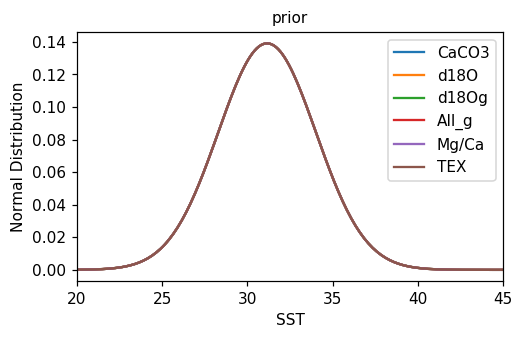

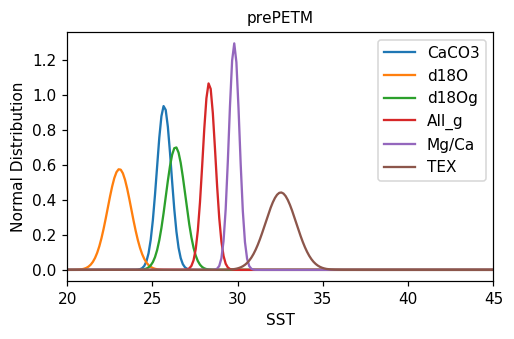

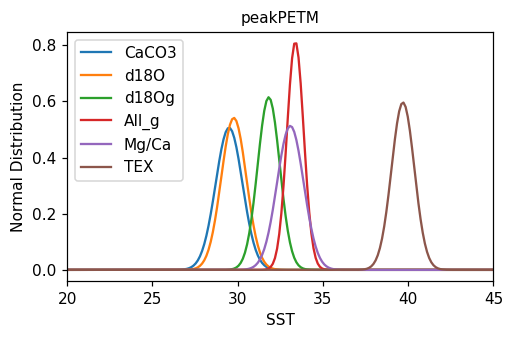

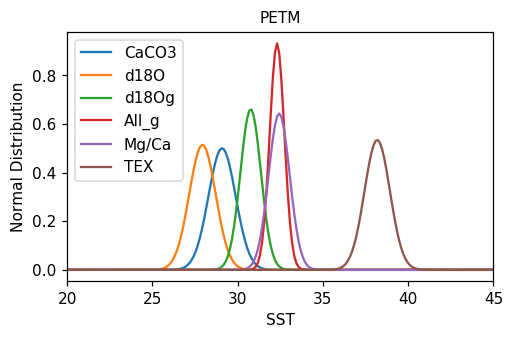

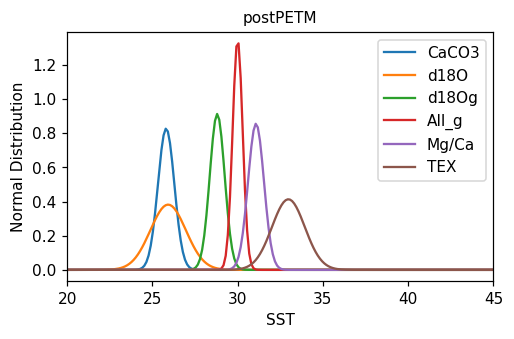

>> File 0 Name petmproxy3slices_v0.0.12.csv_petm9_v12_20200408_caco3only.csv
vari pCO2 stdi pCO2e
slice no 1 id prior mean 2659.000 std 1374.000
>> File 1 Name petmproxy3slices_v0.0.12.csv_petm9_v12_20200408_d18OallOnly.csv
vari pCO2 stdi pCO2e
slice no 1 id prior mean 2659.000 std 1374.000
>> File 2 Name petmproxy3slices_v0.0.12.csv_petm9_v12_20200408_d18OglassyOnly.csv
vari pCO2 stdi pCO2e
slice no 1 id prior mean 2659.000 std 1374.000
>> File 3 Name petmproxy3slices_v0.0.12.csv_petm9_v12_20200408_glassy_all.csv
vari pCO2 stdi pCO2e
slice no 1 id prior mean 2659.000 std 1374.000
>> File 4 Name petmproxy3slices_v0.0.12.csv_petm9_v12_20200408_MgallOnly.csv
vari pCO2 stdi pCO2e
slice no 1 id prior mean 2659.000 std 1374.000
>> File 5 Name petmproxy3slices_v0.0.12.csv_petm9_v12_20200408_TEXallOnly.csv
vari pCO2 stdi pCO2e
slice no 1 id prior mean 2659.000 std 1374.000
>> File 0 Name petmproxy3slices_v0.0.12.csv_petm9_v12_20200408_caco3only.csv
vari pCO2 stdi pCO2e
slice no 2 id prePETM m

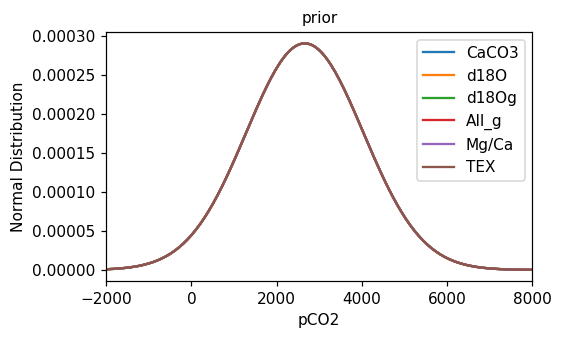

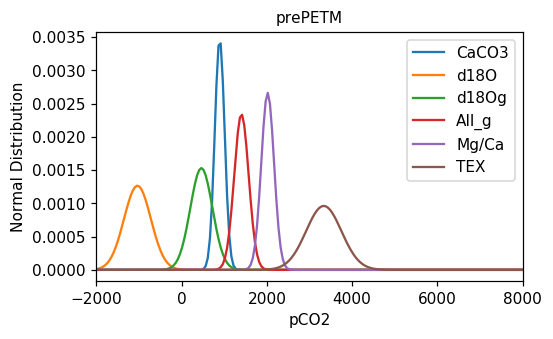

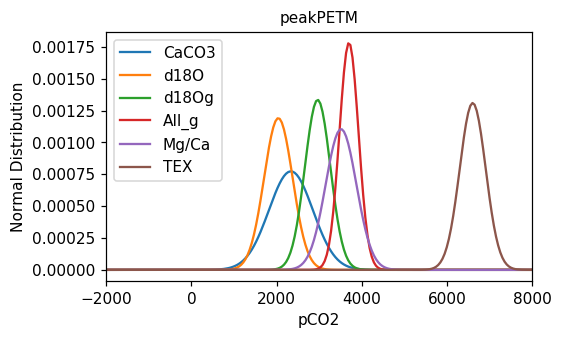

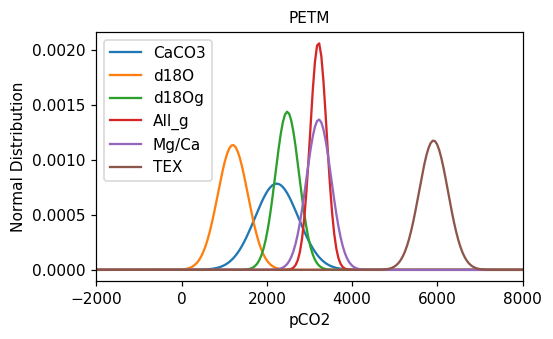

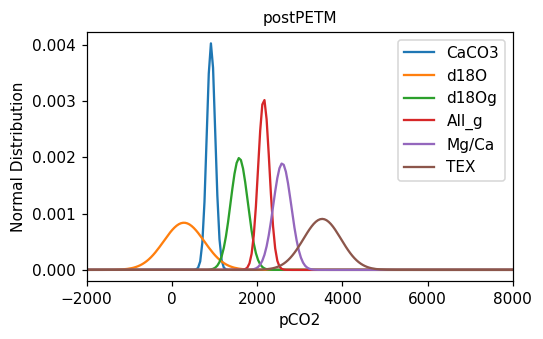

In [5]:
summary_dir = '/mnt/c/Users/mul450/Dropbox/git/deepDA/mlwrk/wrk/variable_sum/'
variable_list = ['SST', 'pCO2']
slicen = 5
x_min = [20, -2000]
x_max = [45, 8000]
label_list = ['CaCO3','d18O', 'd18Og', 'All_g','Mg/Ca','TEX']

variable_list_n = len(variable_list)

summary_dir_list = os.listdir(summary_dir)
sum_list_n = len(summary_dir_list)

print('>> File number is {}'.format(sum_list_n))

for vi in range(variable_list_n):
    for slicei in range(slicen):
    
        x_min_i = x_min[vi]
        x_max_i = x_max[vi]
        
        plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':110})
        fig = plt.figure()
        
        for i in range(sum_list_n):
            print('>> File {} Name {}'.format(i,summary_dir_list[i]))
            
            sum_data = pandas.read_csv(summary_dir+summary_dir_list[i])
            
            vari = variable_list[vi]
            stdi = vari + 'e'
            print('vari {} stdi {}'.format(vari, stdi))
        
            meani = sum_data[vari][slicei]
            stdi  = sum_data[stdi][slicei]
            print('slice no {} id {} mean {:.3f} std {:.3f}'.format(slicei+1,sum_data['ID'][slicei], meani, stdi))            
            
            x = np.linspace(x_min_i, x_max_i, 200)
            y = scipy.stats.norm.pdf(x,meani,stdi)
            plt.plot(x,y, label=label_list[i])
            
            if slicei > 4:
                meani = sum_data[vari][0]
                stdi  = sum_data[stdi][0]
                x = np.linspace(x_min_i, x_max_i, 200)
                y = scipy.stats.norm.pdf(x,meani,stdi)
                plt.plot(x,y)
            
            plt.grid()
            plt.legend()
            plt.xlim(x_min_i,x_max_i)
            
        plt.xlabel(vari)
        #plt.ylim(0,0.25)
        plt.title('{}'.format(sum_data['ID'][slicei]),fontsize=10)    
        plt.ylabel('Normal Distribution')
        
    #plt.savefig("normal_distribution.png")
    plt.show()